# About topic

## Data Description

The dataset used in this project is from an anonymous organization’s social media ad campaign. The file `conversion_data.csv` contains 1143 observations in 11 variables. Below are the descriptions of the variables:

1. **ad_id:**
   - *Description:* Unique identifier for each ad.
   - *Type:* Numeric

2. **xyz_campaign_id:**
   - *Description:* Identifier associated with each ad campaign of XYZ company.
   - *Type:* Numeric

3. **fb_campaign_id:**
   - *Description:* Identifier associated with how Facebook tracks each campaign.
   - *Type:* Numeric

4. **age:**
   - *Description:* Age of the person to whom the ad is shown.
   - *Type:* Numeric

5. **gender:**
   - *Description:* Gender of the person to whom the ad is shown.
   - *Type:* Categorical (e.g., Male, Female)

6. **interest:**
   - *Description:* Code specifying the category to which the person’s interest belongs (as mentioned in the person’s Facebook public profile).
   - *Type:* Numeric

7. **Impressions:**
   - *Description:* The number of times the ad was shown.
   - *Type:* Numeric

8. **Clicks:**
   - *Description:* Number of clicks for that ad.
   - *Type:* Numeric

9. **Spent:**
   - *Description:* Amount paid by company XYZ to Facebook to show that ad.
   - *Type:* Numeric

10. **Total conversion:**
    - *Description:* Total number of people who inquired about the product after seeing the ad.
    - *Type:* Numeric

11. **Approved conversion:**
    - *Description:* Total number of people who bought the product after seeing the ad.
    - *Type:* Numeric

## Brainstorming Ideas for Analysis

1. **Campaign Effectiveness:**
   - Calculate ROI for each campaign.
   - Identify the most effective campaigns based on ROI.

2. **Budget Optimization:**
   - Explore the relationship between budget allocation and campaign performance.
   - Suggest an optimized budget allocation for maximum conversion.

3. **Demographic Analysis:**
   - Analyze age and gender distribution.
   - Explore how age and gender impact conversion rates.

4. **Interest Category Impact:**
   - Explore the distribution of interest categories.
   - Analyze how interest categories correlate with conversion metrics.

5. **Time Series Analysis:**
   - Analyze trends and patterns in campaign performance over different time periods.

6. **Visualization:**
   - Create visualizations like bar charts, histograms, and heatmaps for better interpretation.

# Code

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
kag_conversion_df = pd.read_csv("../data/KAG_conversion_data.csv")

In [4]:
kag_conversion_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
kag_conversion_df.columns = map(str.lower, kag_conversion_df.columns)

## EDA

### Quick look

In [6]:
kag_conversion_df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,impressions,clicks,spent,total_conversion,approved_conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [7]:
kag_conversion_df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
impressions              int64
clicks                   int64
spent                  float64
total_conversion         int64
approved_conversion      int64
dtype: object

### Check missing values

In [8]:
kag_conversion_df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
dtype: int64

=> There are no missing values.

### Distinct values

In [10]:
for column in kag_conversion_df.columns:
    print(column, kag_conversion_df[column].nunique())

ad_id 1143
xyz_campaign_id 3
fb_campaign_id 691
age 4
gender 2
interest 40
impressions 1130
clicks 183
spent 869
total_conversion 32
approved_conversion 16


=> There appears to be three distinct campaigns of company XYZ. These campaigns focus on customers from four age ranges, two genders and 40 different interests.

In [11]:
# Grouping by xyz_campaign_id and counting distinct fb_campaign_id
result = kag_conversion_df.groupby("xyz_campaign_id")["fb_campaign_id"].nunique()

# Printing the result
print(result)

xyz_campaign_id
916      47
936     367
1178    277
Name: fb_campaign_id, dtype: int64


=> Each fb_campaign_id of course only belongs to one campaign. ($47 + 367 + 277 = 691$). Let's see what fb_campaign_id entails.

In [14]:
sorted_df = kag_conversion_df.sort_values(by="fb_campaign_id")
sorted_df.head(20)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


=> Take `fb_campaign_id = 103965` for example, we can see that it entails two different ads focused on the same customer group (age, gender, and interests), but the amount of budget spent on each ad may be different.

### Distribution

#### Impressions

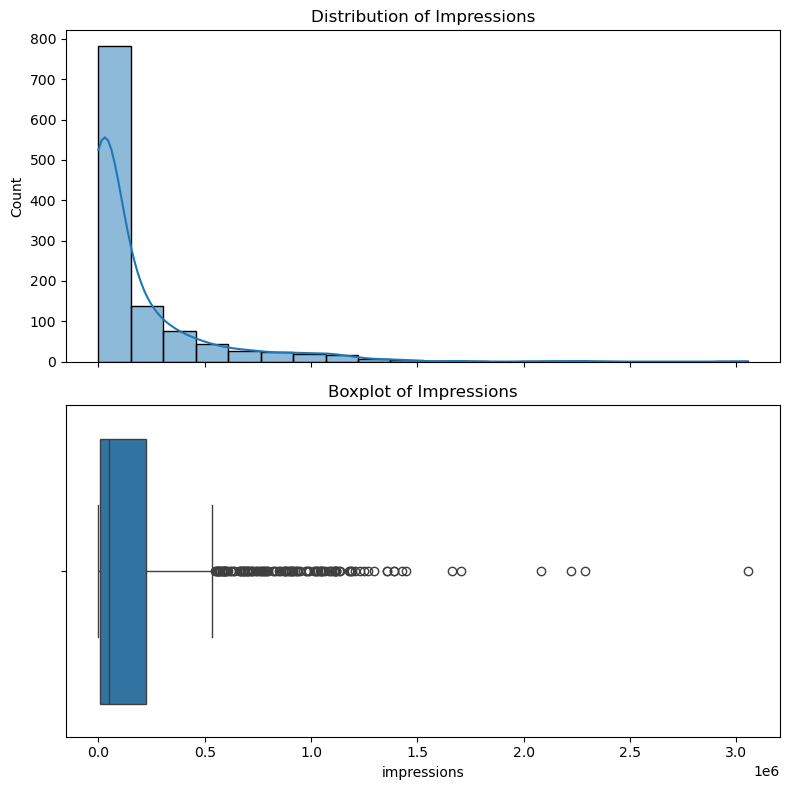

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)

# Plotting histogram
sns.histplot(kag_conversion_df["impressions"], bins=20, kde=True, ax=ax1)
ax1.set_title("Distribution of Impressions")

# Adding a boxplot to visualize outliers
sns.boxplot(x=kag_conversion_df["impressions"], ax=ax2)
ax2.set_title("Boxplot of Impressions")

plt.tight_layout()
plt.show()

#### Spent

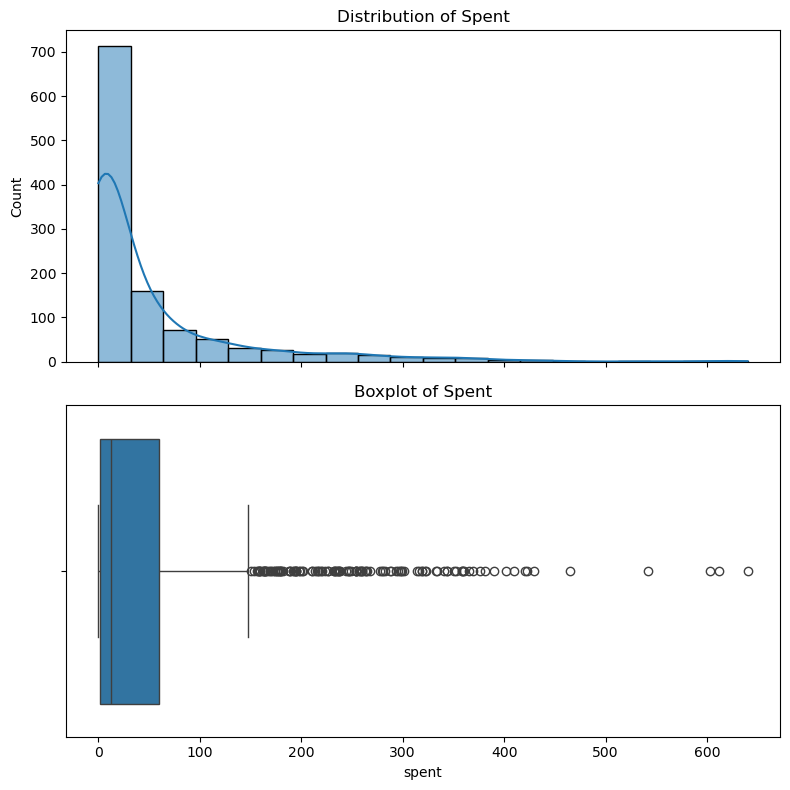

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)

# Plotting histogram
sns.histplot(kag_conversion_df["spent"], bins=20, kde=True, ax=ax1)
ax1.set_title("Distribution of Spent")

# Adding a boxplot to visualize outliers
sns.boxplot(x=kag_conversion_df["spent"], ax=ax2)
ax2.set_title("Boxplot of Spent")

plt.tight_layout()
plt.show()

#### Clicks

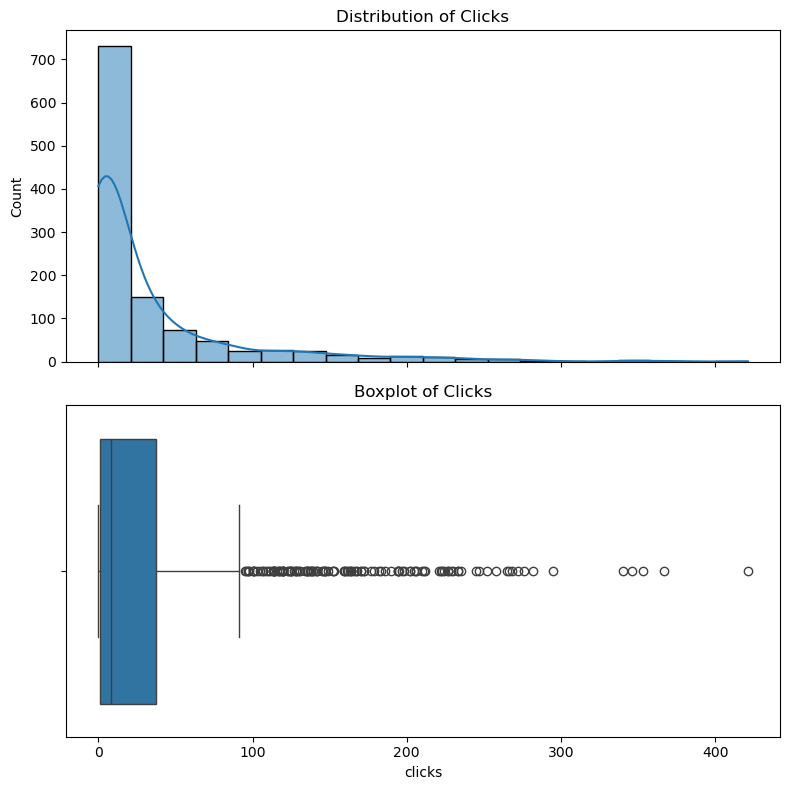

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)

# Plotting histogram
sns.histplot(kag_conversion_df["clicks"], bins=20, kde=True, ax=ax1)
ax1.set_title("Distribution of Clicks")

# Adding a boxplot to visualize outliers
sns.boxplot(x=kag_conversion_df["clicks"], ax=ax2)
ax2.set_title("Boxplot of Clicks")

plt.tight_layout()
plt.show()

#### Total Conversion

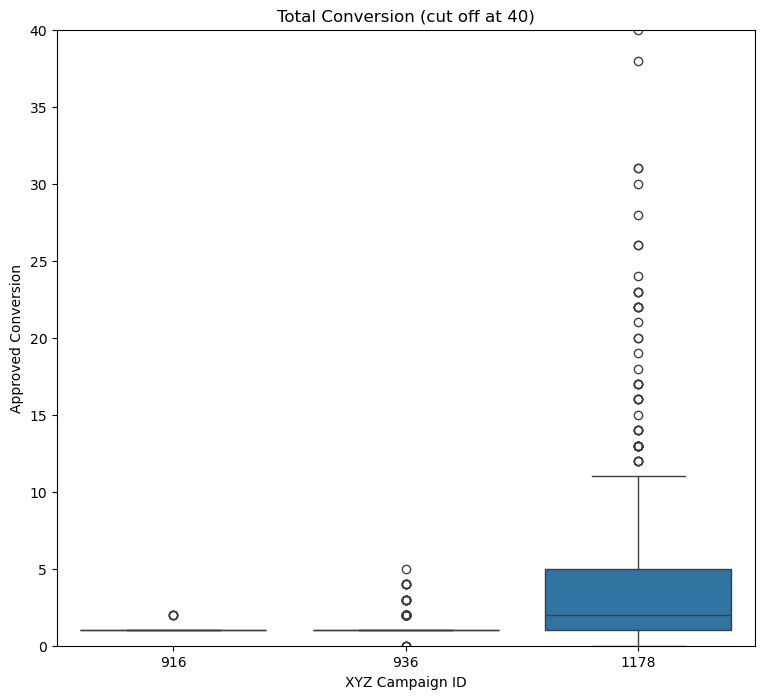

In [49]:
plt.figure(figsize=(9, 8))
sns.boxplot(x="xyz_campaign_id", y="total_conversion", data=kag_conversion_df)

plt.ylim(0, 40)

plt.title("Total Conversion (cut off at 40)")
plt.xlabel("XYZ Campaign ID")
plt.ylabel("Approved Conversion")
plt.show()

#### Approved Conversion

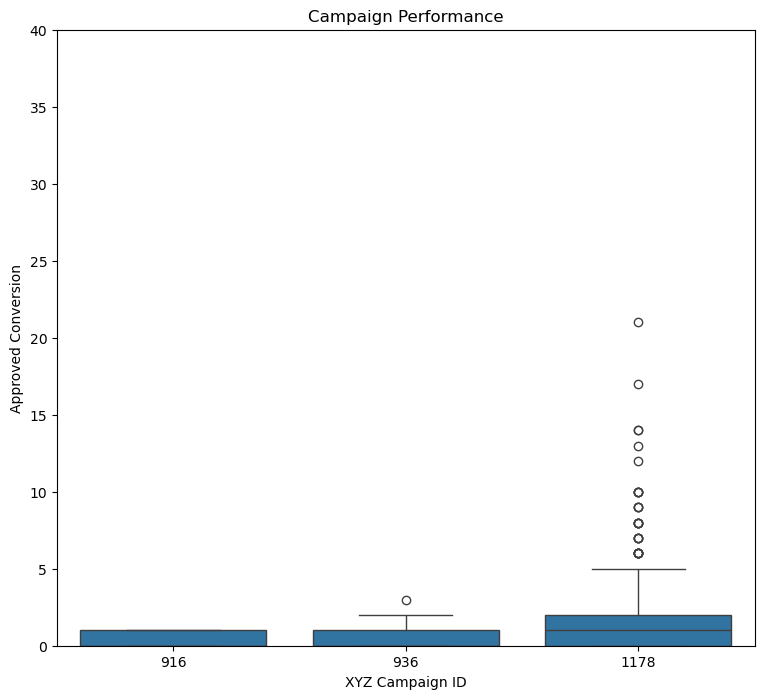

In [47]:
plt.figure(figsize=(9, 8))
sns.boxplot(x="xyz_campaign_id", y="approved_conversion", data=kag_conversion_df)

plt.ylim(0, 40)

plt.title("Campaign Performance")
plt.xlabel("XYZ Campaign ID")
plt.ylabel("Approved Conversion")
plt.show()

#### Gender

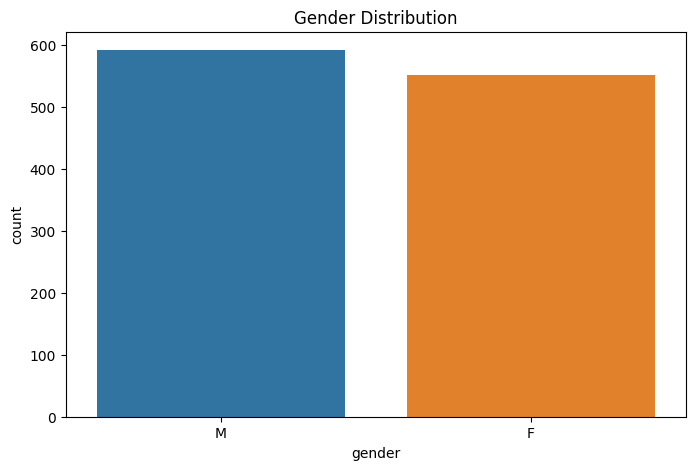

In [15]:
# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=kag_conversion_df)
plt.title('Gender Distribution')
plt.show()

#### Age

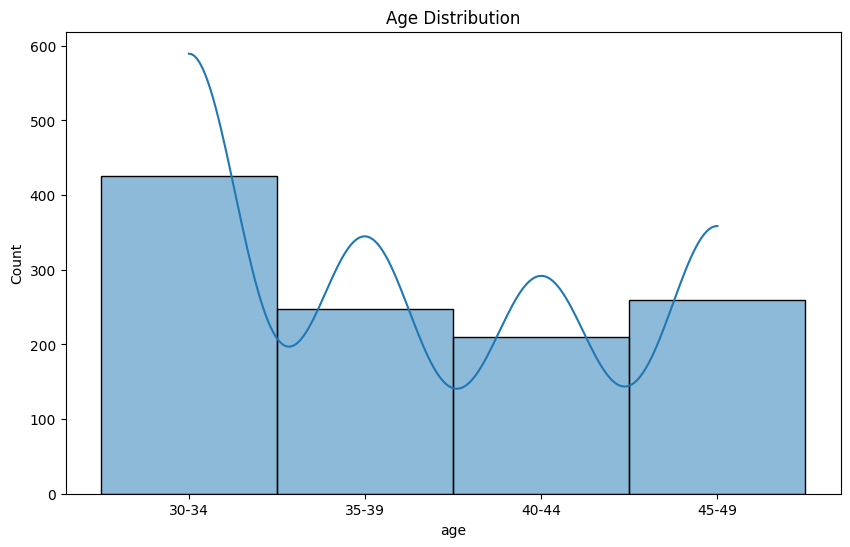

In [16]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(kag_conversion_df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

### Correlation matrix

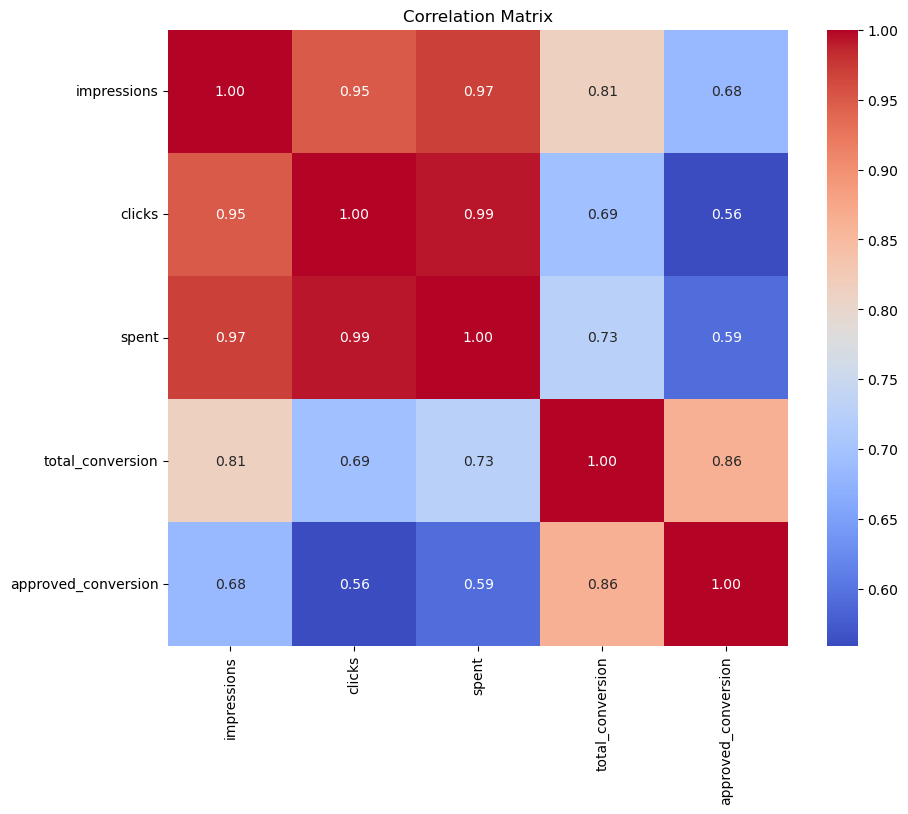

In [65]:
kag_conversion_df_some_columns = kag_conversion_df[
    ["impressions", "clicks", "spent", "total_conversion", "approved_conversion"]
]

# Correlation matrix
correlation_matrix = kag_conversion_df_some_columns.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

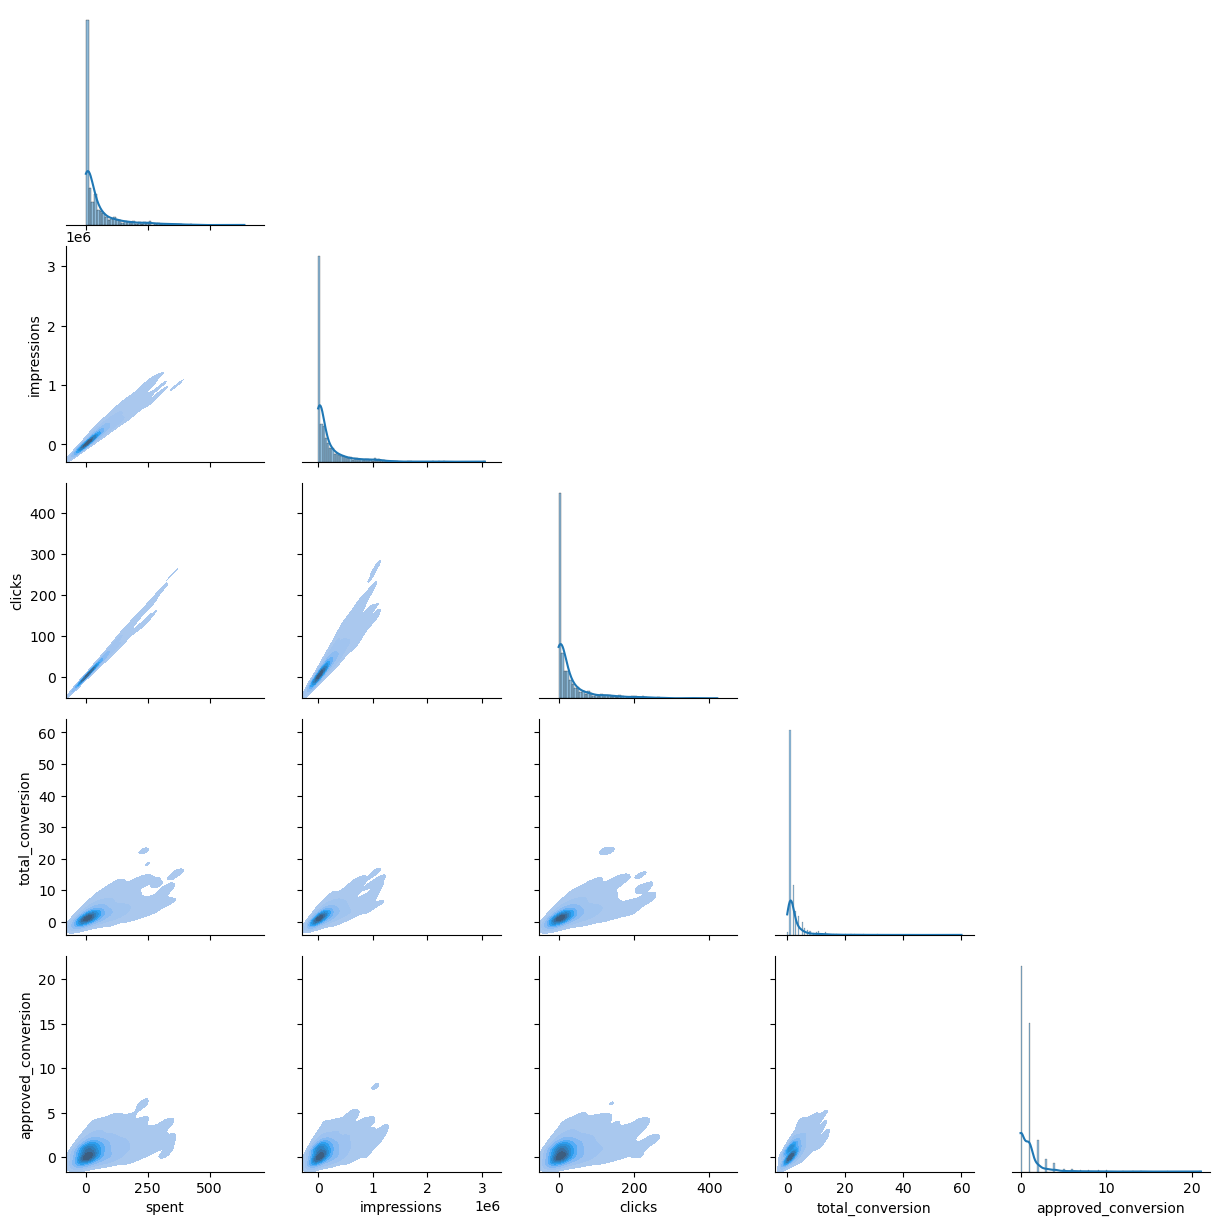

In [69]:
g = sns.PairGrid(
    kag_conversion_df,
    vars=["spent", "impressions", "clicks", "total_conversion", "approved_conversion"],
    diag_sharey=False,
    corner=True,
)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

# plt.savefig("correl.png")

### Constraint violation

Some possible constraints
- If Spent = 0 then Approved_Conversion = 0
- Approved Conversion <= Total Conversions <= Impressions
- Clicks <= Impressions

There does not necessarily exists a constraint between Total Conversions and Impressions. For example, one can see the ad, did not click it but later choose to inquire about it, even if this scenario is admittedly rare.

In [60]:
con_1 = (kag_conversion_df["spent"] == 0) & (kag_conversion_df["approved_conversion"] > 0)
filtered_df = kag_conversion_df[con_1]
len(filtered_df)

71

In [71]:
con2 = ~(
    (kag_conversion_df["approved_conversion"] <= kag_conversion_df["total_conversion"])
    & (kag_conversion_df["total_conversion"] <= kag_conversion_df["impressions"])
)

filtered_df = kag_conversion_df[con2]
len(filtered_df)

0

In [72]:
con3 = ~(kag_conversion_df["clicks"] <= kag_conversion_df["impressions"])

filtered_df = kag_conversion_df[con3]
len(filtered_df)

0

## Analysis

ROI

In [19]:
kag_conversion_df.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [20]:
# Calculate ROI based on approved_conversion/spent
kag_conversion_df['roi_simple'] = kag_conversion_df['approved_conversion'] / kag_conversion_df['spent'] * 100

In [21]:
kag_conversion_df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,roi_simple
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,69.930072
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,77.519382
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.558363
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,1.006492


In [22]:
kag_conversion_df["roi_simple"].isnull().sum()

136

In [23]:
# Subset the DataFrame to include only 'spent' and 'roi_simple' columns
subset_df = kag_conversion_df[['spent', 'roi_simple']]

# Keep only rows where 'spent' value is equal to zero
subset_df_zero_spent = subset_df[subset_df['spent'] == 0]

In [24]:
subset_df_zero_spent

,spent,roi_simple
2,0.0,NaN
5,0.0,inf
10,0.0,NaN
11,0.0,NaN
12,0.0,NaN
...,...,...
719,0.0,NaN
851,0.0,NaN
880,0.0,NaN
882,0.0,NaN


In [25]:
kag_conversion_df["xyz_campaign_id"].unique()

array([ 916,  936, 1178])

In [26]:
len(kag_conversion_df["fb_campaign_id"].unique())

691

In [27]:
len(kag_conversion_df["ad_id"])

1143

**note:** tính ROI bằng cách chia approved_conversion cho spent. Một số trường hợp spent = 0. Cân nhắc xóa, hoặc gộp theo xyz campaign

In [30]:
# Group by 'xyz_campaign_id' and aggregate 'spent' and 'approved_conversion'
campaign_agg = kag_conversion_df.groupby('xyz_campaign_id').agg({
    'spent': 'sum',
    'approved_conversion': 'sum'
}).reset_index()

In [31]:
# Calculate ROI for each campaign
campaign_agg['roi'] = (campaign_agg['approved_conversion'] / campaign_agg['spent']) * 100

In [32]:
campaign_agg

,xyz_campaign_id,spent,approved_conversion,roi
0,916,149.710001,24,16.030993
1,936,2893.369999,183,6.324805
2,1178,55662.149959,872,1.566594


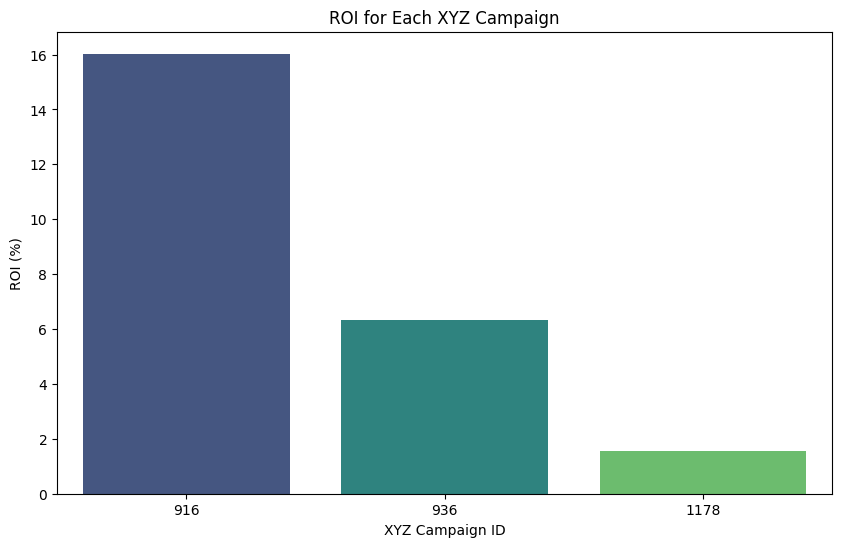

In [34]:
# Plotting ROI for each XYZ campaign
plt.figure(figsize=(10, 6))
sns.barplot(x='xyz_campaign_id', y='roi', data=campaign_agg, palette='viridis')
plt.xlabel('XYZ Campaign ID')
plt.ylabel('ROI (%)')
plt.title('ROI for Each XYZ Campaign')
plt.show()

## Visualisation

[link](http://34.143.255.36:5601/s/it4043e---group27/app/dashboards#/view/c2227360-a3e5-11ee-8d94-5d4fdf5aea4c?_g=(refreshInterval%3A(pause%3A!t%2Cvalue%3A60000)%2Ctime%3A(from%3Anow-30m%2Cto%3Anow)))

[link](http://34.143.255.36:5601/s/it4043e---group27/app/dashboards#/view/fb67cdf0-a3e0-11ee-8d94-5d4fdf5aea4c?_g=(refreshInterval%3A(pause%3A!t%2Cvalue%3A60000)%2Ctime%3A(from%3Anow-30m%2Cto%3Anow)))